In [2]:
import pandas as pd 
import numpy as np


In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

## Steps to be performed.

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train Test Split
### 4. Train the model
### 5. Evaluate the model / model selection
### 6. Deploy the model

In [6]:
# 0. Preprocess data (We are removing unnamed column)

df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt  # As We can perform EDA on it 

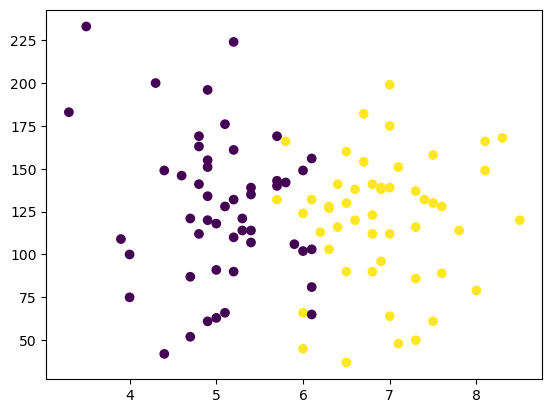

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])    # C=color for placement column

#### By visualizing the data using EDA we can use linear regression algorithm. As we can see that it divides the data linearly. 


In [10]:
# 1. Extracting Input and Output Columns.

# We will divide the data in Input and Output. 

X = df.iloc[:,0:2]     # Over here X (Input) is a independent columns ie. cgpa, iq.
y = df.iloc[:,-1]      # Over here y (Output) is a dependent column ie. placement.

In [11]:
# To see we have the divided data
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
# 3. Train Test Split.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) # It will train from 90% data and test 10% data.

In [14]:
X_train

,cgpa,iq
89,4.9,151.0
92,5.2,110.0
61,7.3,137.0
42,7.6,89.0
35,6.8,90.0
...,...,...
23,4.7,87.0
13,6.4,116.0
99,6.2,113.0
3,7.4,132.0


In [15]:
y_train

89    0
92    0
61    1
42    1
35    1
     ..
23    0
13    1
99    1
3     1
68    0
Name: placement, Length: 90, dtype: int64

In [16]:
# 2. Scaling the values.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # creating object Scaler and it has the power of Standard Scaler function.

In [17]:
X_train = scaler.fit_transform(X_train)  # It will transform the data in array from -1 to 1.

In [18]:
X_train

array([[-0.97777405,  0.66358071],
       [-0.71508848, -0.39918527],
       [ 1.12371047,  0.30068501],
       [ 1.38639603, -0.94352882],
       [ 0.6859012 , -0.9176077 ],
       [-0.71508848,  2.55582257],
       [ 0.33565378,  0.40436949],
       [ 0.24809192,  0.04147379],
       [-0.89021219, -0.89168658],
       [-0.01459364, -1.53971461],
       [ 0.6859012 , -0.34734303],
       [ 2.17445273, -0.13997406],
       [-0.53996477,  0.24884277],
       [ 0.6859012 ,  0.40436949],
       [-0.1021555 , -0.50286976],
       [-0.62752663, -0.11405293],
       [ 1.56151974, -0.29550078],
       [ 0.59833934,  1.46713547],
       [-0.53996477, -0.47694863],
       [ 0.24809192, -0.58063312],
       [ 0.07296821, -1.56563573],
       [ 0.07296821,  0.79318632],
       [ 1.82420531,  1.05239753],
       [ 1.12371047, -1.02129218],
       [-1.0653359 ,  1.13016089],
       [-1.41558332, -2.16182153],
       [ 1.12371047, -1.95445256],
       [ 0.94858676, -2.0062948 ],
       [-0.89021219,

In [19]:
X_test = scaler.transform(X_test)  # The reason we are not using fit_transform as we already know in (X_train) set.

In [20]:
X_test


array([[ 1.29883418, -1.66932022],
       [ 0.77346305, -0.76208097],
       [ 0.77346305,  0.35252725],
       [-0.27727921,  0.1710794 ],
       [ 0.42321563, -2.29142713],
       [-0.97777405,  0.76726519],
       [-0.97777405,  1.83003117],
       [-0.71508848, -0.9176077 ],
       [-1.76583074, -0.65839648],
       [-0.80265034, -1.53971461]])

In [21]:
# 4. Train the Model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()  # Same as Scaler object created above. Refer scaler above.

In [23]:
# Model Training.

clf.fit(X_train, y_train)    # Fit is used for model training 

LogisticRegression()

In [24]:
# 5. Evaluate the Model

y_pred = clf.predict(X_test)

In [25]:
# To Check the accuracy of the model

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

<AxesSubplot:>

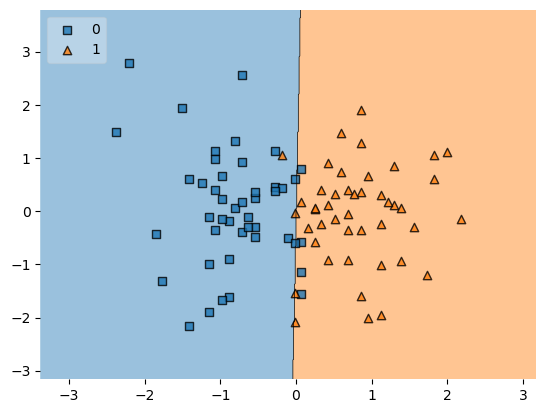

In [29]:
# To See what kind of boundry is created by our model in the dataset.

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

### Above we can see that what line our model has created to predict. 

In [31]:
# To Save the Trained Model 

import joblib

joblib.dump(clf, 'model.joblib')

['model.joblib']